In [1]:
# numpy
import numpy as np

# pandas
import pandas as pd

# graphics
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# networkx
import networkx as nx

# set arial to default font
matplotlib.font_manager._rebuild()
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'


# Subplot functions

In [2]:
def no_right_top(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
def no_border(ax):
    for pos in ['top', 'right', 'left', 'bottom']:
        ax.spines[pos].set_visible(False)

In [3]:
def big_dag(x_pos, y_pos, ax, scale=7):
    graph = nx.DiGraph()
    node_names = ['Cell type', 'Cell cycle', 'Read depth', 'Expression']
    for node_name in node_names:
        graph.add_node(node_name)
    
    tri_factor = 0.6
    sl = scale * tri_factor
    pos = {'Cell type':(x_pos-0.5*sl,y_pos-0.5*sl), 
                'Cell cycle':(x_pos, y_pos+0.57*sl),
                'Read depth':(x_pos, y_pos),
                'Expression':(x_pos+0.5*sl,y_pos-0.5*sl)}     
    
    edges = [('Cell type', 'Cell cycle'), ('Cell type', 'Read depth'), ('Cell type', 'Expression'),
                        ('Cell cycle', 'Read depth'), ('Cell cycle', 'Expression'),
                        ('Read depth', 'Expression')]
    graph.add_edges_from(edges)
    
    # draw - nodes
    nx.draw_networkx_nodes(graph,
                           pos=pos,
                           node_color='none',
                           ax=ax)
    nx.draw_networkx_labels(graph,
                           pos,
                           ax=ax,
                           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round, pad=0.3, rounding_size=0.1'),
                           font_size=25)
    
    # draw - edges
    edges_down = [('Cell cycle', 'Read depth')]
    nx.draw_networkx_edges(graph,
                          pos=pos,
                          width=2,
                          min_source_margin=32,
                          min_target_margin=32,
                          ax=ax,
                          edgelist=edges_down)
    edges_diag_down = [('Cell type', 'Read depth'), ('Read depth', 'Expression')]
    nx.draw_networkx_edges(graph,
                          pos=pos,
                          width=2,
                          min_source_margin=48,
                          min_target_margin=48,
                          ax=ax,
                          edgelist=edges_diag_down)
    edges_bottom = [('Cell type', 'Expression')]
    nx.draw_networkx_edges(graph,
                          pos=pos,
                          width=2,
                          min_source_margin=72,
                          min_target_margin=75,
                          ax=ax,
                          edgelist=edges_bottom)
    edges_side = [('Cell type', 'Cell cycle'), ('Cell cycle', 'Expression')]
    nx.draw_networkx_edges(graph,
                          pos=pos,
                          width=2,
                          min_source_margin=48,
                          min_target_margin=48,
                          ax=ax,
                          edgelist=edges_side,
                          connectionstyle='arc3,rad=-0.2')
    
    no_border(ax)

In [19]:
# fucci score
def fucci_plot(ax):
    df_fucci = pd.read_csv('../data/fucci/meta.csv', index_col=0).sort_values('theta')
    ax.scatter(df_fucci['theta'].values, df_fucci['nCount_RNA'].values, color='grey', s=10)
    df_fucci2 = pd.read_csv('fig1b/fig1b.csv', index_col=0)
    ax.plot(df_fucci2['x'], df_fucci2['y'], color='red', lw=2)
    
    ax.set_ylabel('Total UMI counts', fontsize=18)
    ax.set_xticks([0, np.pi/2, np.pi, np.pi*3/2, np.pi*2])
    ax.set_xticklabels(['0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'], fontsize=15)
    ax.set_xlabel('Cell cycle score', fontsize=18)
    no_right_top(ax)
    
    ax.axvline(np.pi*(1/2+1/10), linestyle='--', alpha=0.8, color='black')
    ax.axvline(np.pi*(1+1/6), linestyle='--', alpha=0.8, color='black')
    
    ax.text(np.pi/4, 90000, 'G1 phase', ha='center', va='center', fontsize=18)
    ax.text(0.88*np.pi, 90000, 'S phase', ha='center', va='center', fontsize=18)
    ax.text(1.6*np.pi, 90000, 'G2/M phase', ha='center', va='center', fontsize=18)


In [23]:
def umi_vs_celltype(ax):
    # https://pythonbasics.org/seaborn-boxplot/
    # https://stackoverflow.com/questions/43434020/black-and-white-boxplots-in-seaborn
    df = pd.read_csv('fig1c/fig1c.csv', index_col=0)
    sns.boxplot(x='celltype', y='nCount_RNA', data=df, ax=ax, 
                order=['Monocytes', 'B cells', 'DCs'],
                width=0.4,
                
               )
    ax.set_yscale('log')
    ax.set_ylabel('Total UMI counts', fontsize=18)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
    no_right_top(ax)
    
    cols = ['red', 'blue', 'orange']
    for i, (box, col) in enumerate(zip(ax.artists,cols)):
        box.set_facecolor('white')
        box.set_edgecolor(col)
        
        for j in range(6*i, 6*(i+1)):
            ax.lines[j].set_color(col)
            

    ax.set_xlim([-0.5, 3.5])
    
    # anova: https://partrita.github.io/posts/ANOVA-python/
    #model = ols('np.log(nCount_RNA) ~ C(celltype)', df).fit()
    #print(anova_lm(model))
    # 해보니 p-value가 0임 의미 없음
    ax.text(1.7, 500, 'ANOVA \n'+ r'$\it{P}$-value < $2 \times 10^{-16}$', fontsize=25)
    
    

In [6]:
def normed_gene_exps(axes, fign):
    df = pd.read_csv('fig1%s/fig1%s.csv' % (fign, fign), index_col=0)
    genes = ['CD14', 'LYZ', 'CD79A', 'CD79B', 'MS4A1']
    for i, gene in enumerate(genes):
        sns.boxplot(x='method', y=gene, hue='celltype', 
            data=df,
            ax=axes[i], 
            hue_order=['Monocytes', 'DCs', 'B cells'], 
            palette=['red', 'orange', 'blue']
            )
        
        axes[i].set_title(gene, fontsize=18, fontweight='bold', style='italic')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=18)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].legend([], [], frameon=False)
        no_right_top(axes[i])
        
        cols = ['red', 'orange', 'blue'] * 3
        for k, (box, col) in enumerate(zip(axes[i].artists,cols)):
            box.set_facecolor('white')
            box.set_edgecolor(col)
        
            for j in range(6*k, 6*(k+1)):
                axes[i].lines[j].set_color(col)
        
        axes[i].yaxis.set_tick_params(labelsize=13)

In [7]:
def collider_plot_one(ax):
    graph = nx.DiGraph()
    pos = {'$X$':(-0.4,0.2), '$Y$':(0.4,0.2), '$Z$':(0,0.5)}
    graph.add_edges_from([('$X$', '$Z$'), 
                         ('$Y$', '$Z$')
                         ])

    # draw graph
    nx.draw_networkx_nodes(graph, 
                           pos=pos, node_color=['black','blue','black'], node_size=1000,
                           ax=ax, alpha=0.3)
    nx.draw_networkx_edges(graph, pos, alpha=1, width=2,
                          min_source_margin=30,
                          min_target_margin=30, 
                        ax=ax)
    nx.draw_networkx_labels(graph, pos, ax=ax, font_size=20)

    # adjust margin
    ax.set_ylim([-0.5,0.6])
    ax.set_xlim([-0.8,0.8])

    # add text

    ax.text(0, 0, r'$Z$ is a collider of $X$ and $Y$', ha='center', fontsize=25)

    ax.text(0, -0.35, r'$X \sim \mathcal{N}(0,1)$' + '\n' + 
               r'$Y \sim \mathcal{N}(0,1)$' + '\n' +
               r'$Z \sim \mathcal{N}(X+Y,1)$'     
               , ha='center', fontsize=30)
    ax.text(0, -0.49, r'$X \perp Y$: independent', fontsize=30, ha='center')


    # remove border
    ax.axis('off')

In [8]:
def collider_plot_two(ax):
    import scipy.stats as ss

    #fig2b data generation
    n = 500
    x = np.random.normal(0, 1, size=n)
    y = np.random.normal(0, 1, size=n)
    z = np.random.normal(2*x+2*y, 1, size=n)
    df = pd.DataFrame({'x':x, 'y':y, 'z':z})

    # line - unadjusted
    s_unadj, int_unadj, _, p_unadj, _ = ss.linregress(df['x'],df['y'])

    # line - adjusted
    s_adj, int_adj, _, p_adj, _ = ss.linregress(df.loc[df['z']>2,'x'], df.loc[df['z']>2, 'y'])
    
    # draw figure
    cmap = cm.get_cmap('Paired', 12)
    col_unadj = cmap(1)
    col_adj = cmap(5)

    # scatterplot
    s = 15
    ax.plot(x, y, '.', c=col_unadj)
    ax.plot(df.loc[df['z']>1.2,'x'], df.loc[df['z']>1.2,'y'], '.', c=col_adj)

    # lineplot
    lw = 3
    xlim, ylim = 3.5, 3.5
    xlin, ylin = np.linspace(-xlim,xlim,10), np.linspace(-ylim,ylim,10)
    xlin2 = np.linspace(-xlim+2, xlim, 10)
    line_unadj, = ax.plot(xlin, int_unadj + s_unadj*xlin, linewidth=lw, c=col_unadj)
    line_adj, = ax.plot(xlin2, int_adj + s_adj*xlin, linewidth=lw, c=col_adj)

    # adjust margin
    ax.set_xlim([-7,7])
    ax.set_ylim([-8,4])

    # legend

    lgd2a1 = ax.legend(handles=[line_unadj, line_adj], labels=['Marginal\nslope:%.2f\n$P$-value:%.2f'%(s_unadj,p_unadj), 
                                                                  'Conditional on $Z$ \nslope:%.2f\n$P$-value<2x$10^{-16}$'%(s_adj)], 
                          fontsize=18,
                         bbox_to_anchor=(0.5, 0.2), loc='lower center', ncol=2)
    lgd2a1.get_frame().set_linewidth(0.0)

    # text
    ax.text(0, -7.8, '$\it{Selection\,\,bias}$:'+'\n'+'A non-causal assocation d/t' +'\n' +'conditioning on a collider', ha='center', fontsize=18)

    # remove border
    ax.axis('off')

    # axis arrow

    arrow1 = mpatches.Arrow(4.3,2,14/7,0,width=0.3,color='black')
    arrow2 = mpatches.Arrow(4.3,2,0,12/7,width=0.3,color='black')
    ax.text(6.0, 1.8, r'$X$', va='top', ha='center', fontsize=12)
    ax.text(4.2, 3.7, r'$Y$', ha='right', va='center', fontsize=12)
    ax.add_patch(arrow1)
    ax.add_patch(arrow2)

In [25]:
def collider_cc_one(ax):
    df = pd.read_csv('fig1g/fig1g.csv', index_col=0)
    cmap = cm.get_cmap('Paired', 12)
    red = cmap(5)
    
    # scatterplot
    cols = df['before'].apply(lambda x: red if x<0.05/df.shape[0] else 'grey')
    h1 = scatter = ax.scatter(-np.log10(df['before']), -np.log10(df['after']), color=cols, s=5, label='sig')
    
    # diagonal line
    ax.plot(np.linspace(0,100), np.linspace(0,100), color='black', linestyle='--')
    ax.set_xlim([0,80])
    ax.set_ylim([0,80])
    
    # vertical/horizontal lines
    h2 = ax.axvline(-np.log10(0.05/df.shape[0]), linestyle='--', color='black', label='Significance threshold', ymax=0.75)
    ax.axhline(-np.log10(0.05/df.shape[0]), linestyle='--', color='black')
    
    # legend
    ax.legend(handles=[h1, h2], labels=['Significant before adjustment', 'Significance threshold'], frameon=False, fontsize=20, loc='upper left',
             handletextpad=0.1, markerscale=3)
    
    # 
    ax.spines['left'].set_position(('outward', 20))
    ax.spines['bottom'].set_position(('outward', 20))
    
    # tick labels
    ax.set_xticks([20*i for i in range(5)])
    ax.set_yticks([20*i for i in range(5)])
    ax.set_xticklabels([20*i for i in range(5)], fontsize=15)
    ax.set_yticklabels([20*i for i in range(5)], fontsize=15)
    
    # label
    ax.set_xlabel(r'-log10 $\it{P}$-value before read-depth adjustment', fontsize=20)
    ax.set_ylabel(r'-log10 $\it{P}$-value after read-depth adjustment', fontsize=20)
    
    no_right_top(ax)

In [33]:
def collider_cc_two(ax):
    df = pd.read_csv('fig1h/fig1h.csv', index_col=0)
    df['percent'] = np.linspace(0,30,31)
    
    # plot
    line1 = ax.plot(df['percent'], np.log10(df['Fucci.score']), label='Cell-cycle score', color='red')
    line2 = ax.plot(df['percent'], np.log10(df['Seurat.score']), label='Seurat score', color='blue')
    
    #
    ax.spines['left'].set_position(('outward', 20))
    ax.spines['bottom'].set_position(('outward', 20))
    
    # label
    ax.set_ylabel('log10 $\it{P}$-value', fontsize=20)
    ax.set_xlabel('% cells removed by read-depth', fontsize=20)
    
    # axhline
    ax.axhline(np.log10(0.05), linestyle='--', color='grey', label='Significance threshold')
    
    # limit
    ax.set_xlim([0,30])
    ax.set_ylim([-5,0])
    no_right_top(ax)
    
    ax.set_yticks([-5,-4,-3,-2,-1,0])
    ax.set_xticks([0,5,10,15,20,25,30])
    
    ax.set_yticklabels([-5,-4,-3,-2,-1,0], fontsize=15)
    ax.set_xticklabels([0,5,10,15,20,25,30], fontsize=15)
    
    # legend
    lgd = ax.legend(frameon=False, fontsize=18)

# Main plot

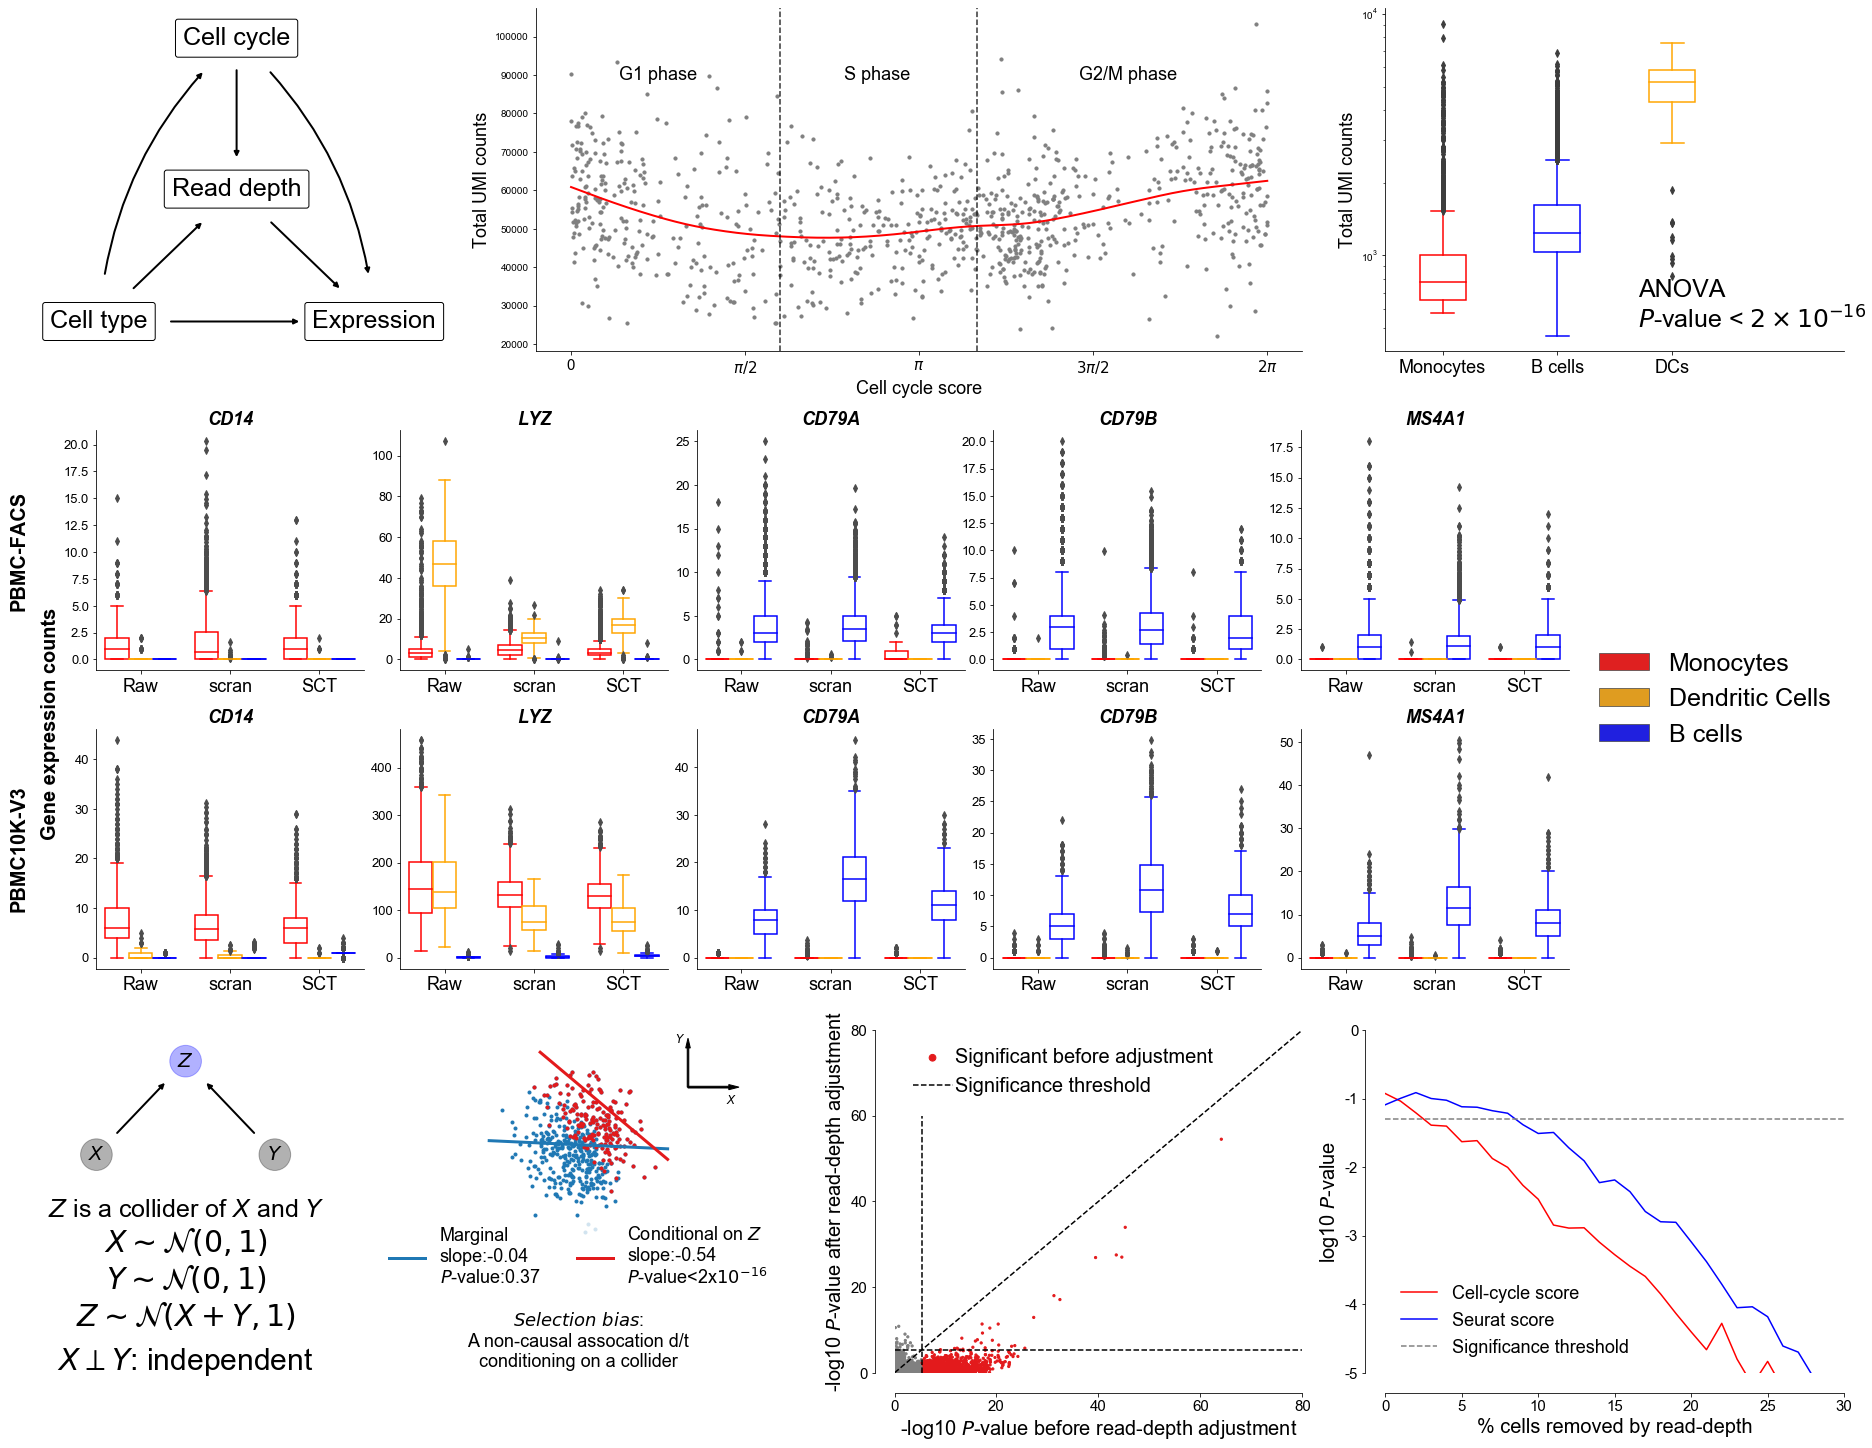

In [34]:
fig1 = plt.figure(figsize=(26, 20), constrained_layout=True) 
gs1 = fig1.add_gridspec(4, 32, height_ratios=[1, 0.7, 0.7, 1]) # 행 렬

# figure 1a
fig1a = fig1.add_subplot(gs1[0,0:9])
fig1a.set_xlim([0,1])
big_dag(0.5, 0.3, fig1a, 1)

# figure 1b
fig1b = fig1.add_subplot(gs1[0,9:23])
fucci_plot(fig1b)

# figure 1c
fig1c = fig1.add_subplot(gs1[0,23:32])
umi_vs_celltype(fig1c)

# figure 1d, 1e
fig1d = []
for i in range(5):
    fig1d.append(fig1.add_subplot(gs1[1,5*i+2:5*(i+1)+2]))
normed_gene_exps(fig1d, 'd')

fig1d_lgd_ax = fig1.add_subplot(gs1[1,0:2])
fig1d_lgd_ax.text(0.2, 0.5, 'PBMC-FACS', fontsize=20, ha='center', va='center', rotation=90, fontweight='bold')
fig1d_lgd_ax.axis('off')

fig1e = []
for i in range(5):
    fig1e.append(fig1.add_subplot(gs1[2,5*i+2:5*(i+1)+2]))
normed_gene_exps(fig1e, 'e')

fig1e_lgd_ax = fig1.add_subplot(gs1[2,0:2])
fig1e_lgd_ax.text(0.2, 0.5, 'PBMC10K-V3', fontsize=20, ha='center', va='center', rotation=90, fontweight='bold')   
fig1e_lgd_ax.axis('off')

fig1de_lgd_ax = fig1.add_subplot(gs1[1:3, 27:32])
fig1de_lgd_ax.axis('off')
handles, _ = fig1e[0].get_legend_handles_labels() 
fig1de_lgd_ax.legend(handles=handles, labels=['Monocytes', 'Dendritic Cells', 'B cells'], bbox_to_anchor=(0, 0.5), loc='center left', 
                    fontsize=25, frameon=False)
fig1.text(0.025, 0.5, 'Gene expression counts', fontsize=20, ha='center', va='center', rotation=90, fontweight='bold')

# figure 1f, 1g
fig1f = []
for i in range(2):
    fig1f.append(fig1.add_subplot(gs1[3,7*i:7*(i+1)]))
fig1f.append(fig1.add_subplot(gs1[3,15:23]))
fig1f.append(fig1.add_subplot(gs1[3,23:]))

collider_plot_one(fig1f[0])
collider_plot_two(fig1f[1])
collider_cc_one(fig1f[2])
collider_cc_two(fig1f[3])

plt.show()